In [13]:
import pandas as pd
import zipfile
import seaborn as sns # For plotting
import matplotlib.pyplot as plt # For showing plots


df = pd.read_csv('EFIplus_medit.zip',compression='zip', sep=";")
print(df)
df.head(10)
df.info()
print(list(df.columns))

       Site_code   Latitude  Longitude   Country Catchment_name  Galiza  \
0     ES_01_0002  38.102003  -4.096070     Spain   Guadalquivir       0   
1     ES_02_0001  40.530188  -1.887796     Spain           Tejo       0   
2     ES_02_0002  40.595432  -1.928079     Spain           Tejo       0   
3     ES_02_0003  40.656184  -1.989831     Spain           Tejo       0   
4     ES_02_0004  40.676402  -2.036274     Spain           Tejo       0   
...          ...        ...        ...       ...            ...     ...   
5006      PTVO60  40.641612  -8.325149  Portugal          Vouga       0   
5007      PTVO61  40.729015  -8.098851  Portugal          Vouga       0   
5008      PTVO62  40.727959  -8.107344  Portugal          Vouga       0   
5009      PTVO63  40.817783  -8.224903  Portugal          Vouga       0   
5010      PTVO64  40.794352  -8.255380  Portugal          Vouga       0   

      Subsample  Calib_EFI_Medit  Calib_connect  Calib_hydrol  ...  \
0             1              

In [14]:
# clean up the dataset to remove unnecessary columns (eg. REG)
df.drop(df.iloc[:,5:15], axis=1, inplace=True)
print(df)

       Site_code   Latitude  Longitude   Country Catchment_name  \
0     ES_01_0002  38.102003  -4.096070     Spain   Guadalquivir   
1     ES_02_0001  40.530188  -1.887796     Spain           Tejo   
2     ES_02_0002  40.595432  -1.928079     Spain           Tejo   
3     ES_02_0003  40.656184  -1.989831     Spain           Tejo   
4     ES_02_0004  40.676402  -2.036274     Spain           Tejo   
...          ...        ...        ...       ...            ...   
5006      PTVO60  40.641612  -8.325149  Portugal          Vouga   
5007      PTVO61  40.729015  -8.098851  Portugal          Vouga   
5008      PTVO62  40.727959  -8.107344  Portugal          Vouga   
5009      PTVO63  40.817783  -8.224903  Portugal          Vouga   
5010      PTVO64  40.794352  -8.255380  Portugal          Vouga   

     Water_source_type Flow_regime  Altitude Geological_typology  \
0              Pluvial   Permanent       199           Siliceous   
1          Groundwater   Permanent      1253          Calca

In [15]:
# let's rename some columns so that they make sense
df.rename(columns={'Sum of Run1_number_all':'Total_fish_individuals'}, inplace=True) # inplace="True"


# for sake of consistency, let's also make all column labels of type string
df.columns = list(map(str, df.columns))
# Check data types
pd.options.display.max_rows = 154 # maximum number of rows displayed.
df.dtypes
# Number of values per variable
df.count()

Site_code                               5011
Latitude                                5011
Longitude                               5011
Country                                 5011
Catchment_name                          5011
Water_source_type                       4712
Flow_regime                             4473
Altitude                                5011
Geological_typology                     5011
Actual_river_slope                      4975
Natural_sediment                        4402
Elevation_mean_catch                    4841
prec_ann_catch                          4841
temp_ann                                4841
temp_jan                                4841
temp_jul                                4841
Barriers_catchment_down                 5011
Barriers_river_segment_up               5009
Barriers_river_segment_down             5009
Barriers_number_river_segment_up        5008
Barriers_number_river_segment_down      5009
Barriers_distance_river_segment_up      4998
Barriers_d

In [16]:
df.isnull().sum()

Site_code                                  0
Latitude                                   0
Longitude                                  0
Country                                    0
Catchment_name                             0
Water_source_type                        299
Flow_regime                              538
Altitude                                   0
Geological_typology                        0
Actual_river_slope                        36
Natural_sediment                         609
Elevation_mean_catch                     170
prec_ann_catch                           170
temp_ann                                 170
temp_jan                                 170
temp_jul                                 170
Barriers_catchment_down                    0
Barriers_river_segment_up                  2
Barriers_river_segment_down                2
Barriers_number_river_segment_up           3
Barriers_number_river_segment_down         2
Barriers_distance_river_segment_up        13
Barriers_d

In [17]:
df2 = df.dropna(how='all') # drops rows when all elements are missing values
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5011 entries, 0 to 5010
Columns: 154 entries, Site_code to Iberochondrostoma_sp
dtypes: float64(35), int64(113), object(6)
memory usage: 5.9+ MB


In [18]:
df2 = df.dropna(how='all', axis=1) # drops columns when at least one element is a missing value
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5011 entries, 0 to 5010
Columns: 154 entries, Site_code to Iberochondrostoma_sp
dtypes: float64(35), int64(113), object(6)
memory usage: 5.9+ MB


In [19]:
df2 = df.dropna() # drops rows when at least one element is a missing value
df2.info()


<class 'pandas.core.frame.DataFrame'>
Index: 2822 entries, 18 to 5010
Columns: 154 entries, Site_code to Iberochondrostoma_sp
dtypes: float64(35), int64(113), object(6)
memory usage: 3.3+ MB


In [20]:
print(df['Catchment_name'].mode())

0    Ebro
Name: Catchment_name, dtype: object


In [21]:
df.describe()

,Latitude,Longitude,Altitude,Actual_river_slope,Natural_sediment,Elevation_mean_catch,prec_ann_catch,temp_ann,temp_jan,temp_jul,...,Squalius malacitanus,Squalius pyrenaicus,Squalius torgalensis,Thymallus thymallus,Tinca tinca,Zingel asper,Squalius sp,Barbatula sp,Phoxinus sp,Iberochondrostoma_sp
count,5011.000000,5011.000000,5011.000000,4975.000000,4402.000000,4841.000000,4841.000000,4841.000000,4841.000000,4841.000000,...,5011.000000,5011.000000,5011.000000,5011.000000,5011.000000,5011.000000,5011.000000,5011.000000,5011.000000,5011.000000
mean,41.660286,-4.220392,428.072042,14.582432,3.062017,785.177935,941.823810,13.261950,6.211403,20.604503,...,0.000399,0.085412,0.000599,0.000399,0.012373,0.000200,0.196568,0.068250,0.132708,0.031132
std,1.654641,4.754419,342.912849,22.596125,0.567240,432.725266,292.497317,2.172315,2.662325,2.583101,...,0.019976,0.279522,0.024463,0.019976,0.110554,0.014127,0.397442,0.252199,0.339293,0.173690
min,36.213984,-9.459453,0.000000,0.000000,1.000000,52.249944,373.366940,3.900000,-2.700000,11.900000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.450919,-7.716600,142.000000,3.509500,3.000000,468.393265,677.473828,12.000000,4.300000,18.800000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,42.316060,-6.176062,375.000000,8.000000,3.000000,701.438554,968.898321,13.400000,6.400000,20.100000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,42.904789,-1.959129,610.500000,17.170000,3.000000,1049.983330,1168.356822,14.600000,8.300000,22.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,45.098423,15.625773,1851.000000,774.000000,4.000000,2545.546876,1739.000486,18.300000,12.500000,28.200000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [22]:
df2.head()

,Site_code,Latitude,Longitude,Country,Catchment_name,Water_source_type,Flow_regime,Altitude,Geological_typology,Actual_river_slope,...,Squalius malacitanus,Squalius pyrenaicus,Squalius torgalensis,Thymallus thymallus,Tinca tinca,Zingel asper,Squalius sp,Barbatula sp,Phoxinus sp,Iberochondrostoma_sp
18,ES_03_0001,41.957268,-2.926857,Spain,Douro,Nival,Permanent,1179,Siliceous,0.001,...,0,0,0,0,0,0,1,0,0,0
19,ES_03_0002,41.850818,-2.591150,Spain,Douro,Nival,Permanent,1038,Siliceous,2.258,...,0,0,0,0,0,0,1,0,0,0
28,ES_03_0012,41.498026,-5.528753,Spain,Douro,Pluvial,Permanent,636,Siliceous,0.263,...,0,0,0,0,0,0,1,0,0,0
32,ES_03_0016,41.586853,-3.072064,Spain,Douro,Pluvial,Permanent,890,Calcareous,2.909,...,0,0,0,0,0,0,1,0,0,0
43,ES_03_0029,41.830177,-3.782420,Spain,Douro,Groundwater,Permanent,872,Calcareous,3.530,...,0,0,0,0,0,0,1,0,0,0


Estatística do qui-quadrado: 496.3723854072799
p_value: 2.9162328651936495e-107


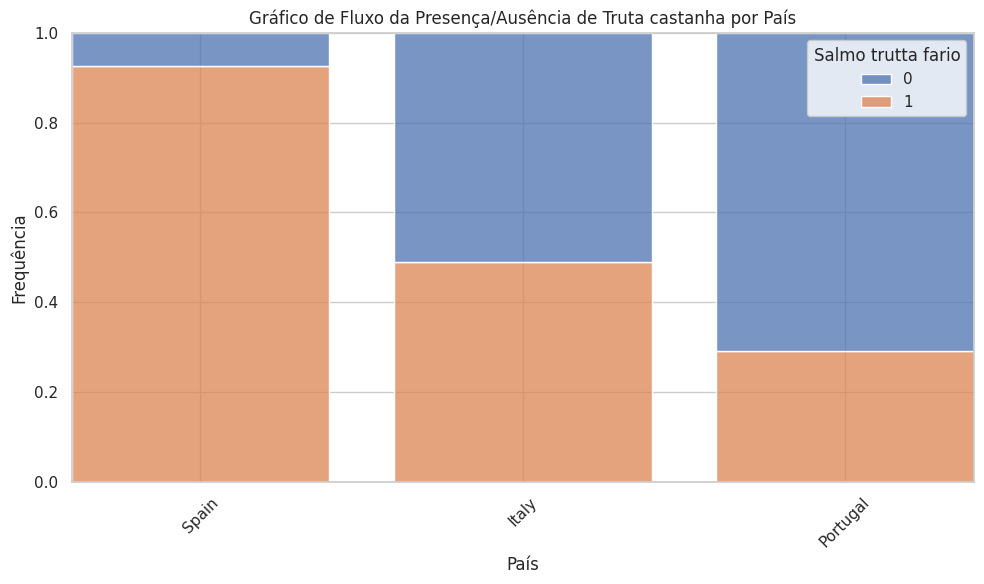

In [27]:
import pandas as pd
from scipy.stats import chi2_contingency
import seaborn as sns
import matplotlib.pyplot as plt



tabela_contingencia = pd.crosstab(df['Country'], df['Salmo trutta fario'])


qui2, p_value, graus_liberdade, esperado = chi2_contingency(tabela_contingencia)
print("Estatística do qui-quadrado:", qui2)
print("p_value:", p_value)

plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
sns.histplot(df2, x="Country", hue="Salmo trutta fario", multiple="fill", shrink=.8)
plt.title('Gráfico de Fluxo da Presença/Ausência de Truta castanha por País')
plt.xlabel('País')
plt.ylabel('Frequência')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Com um p_value tão pequeno rejeitamos a hipotse nula, ou seja sugere que são variaveis independentes. É mais provavel encontar em Espanha.

In [28]:
import pandas as pd
import numpy as np
from scipy import stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Filtrar os oito locais de captação com mais amostras
top_eight_catchments = df2['Catchment_name'].value_counts().nlargest(8).index

# Filtrar o dataframe para incluir apenas dados dos oito locais de captação principais
df_top_eight = df2[df2['Catchment_name'].isin(top_eight_catchments)]

# Realizar ANOVA para os oito locais de captação principais
f_statistic, p_value_anova = stats.f_oneway(*[df_top_eight[df_top_eight['Catchment_name'] == c]['Elevation_mean_catch'] for c in df_top_eight['Catchment_name'].unique()])
print("ANOVA - F-Statistic:", f_statistic)
print("ANOVA - P-Value:", p_value_anova)


# Realizar o teste post-hoc de Tukey's HSD
tukey_results = pairwise_tukeyhsd(df_top_eight['Elevation_mean_catch'], df_top_eight['Catchment_name'])
print("Tukey's HSD Results:")
print(tukey_results)

# Realizar o teste de Kruskal-Wallis
h_statistic, p_value_kruskal = stats.kruskal(*[df_top_eight[df_top_eight['Catchment_name'] == c]['Elevation_mean_catch'] for c in df_top_eight['Catchment_name'].unique()])
print("Kruskal-Wallis H-Statistic:", h_statistic)
print("Kruskal-Wallis P-Value:", p_value_kruskal)



ANOVA - F-Statistic: 157.1736402882748
ANOVA - P-Value: 3.9710096360208786e-193
Tukey's HSD Results:
         Multiple Comparison of Means - Tukey HSD, FWER=0.05         
   group1       group2     meandiff p-adj    lower     upper   reject
---------------------------------------------------------------------
  Cantabrica        Douro   113.406 0.0002   37.6078  189.2042   True
  Cantabrica Galiza-Norte -219.0555    0.0 -280.5173 -157.5936   True
  Cantabrica   Galiza-Sul   32.9023 0.9841   -75.407  141.2115  False
  Cantabrica       Guadia -330.6163    0.0 -435.9711 -225.2614   True
  Cantabrica        Minho  258.0052    0.0  196.4999  319.5105   True
  Cantabrica      Mondego  -40.3519 0.9597 -153.0173   72.3134  False
  Cantabrica         Tejo -202.1506    0.0  -281.215 -123.0862   True
       Douro Galiza-Norte -332.4615    0.0 -399.2247 -265.6983   True
       Douro   Galiza-Sul  -80.5038 0.3568 -191.9068   30.8993  False
       Douro       Guadia -444.0223    0.0 -552.5552 -335.4

ANOVA:
F-Statistic: 157.17 P-Value: 3.97e-193  O valor extremamente baixo de p sugere uma forte evidência contra a hipótese nula.

Kruskal-Wallis H:

H-Statistic: 832.77 P-Value: 1.57e-175 igualmente a anterior valor de p é extremamente baixo, sugere uma forte evidência contra a hipótese nula

In [30]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Carregar o conjunto de dados
data = pd.read_csv('winequality_red.csv')

# Criar uma variável alvo binária com base no limiar de qualidade (5)
data['quality_category'] = data['quality'].apply(lambda x: 'bom' if x > 5 else 'ruim')

# Definir features e variável alvo
X = data.drop(['quality', 'quality_category'], axis=1)
y = data['quality_category']

# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicializar e treinar o modelo de regressão logística
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
predictions = logistic_model.predict(X_test)

# Avaliar o modelo
accuracy = accuracy_score(y_test, predictions)
print("accuracy:", acuracia)

# Imprimir o relatório de classificação
print(classification_report(y_test, predictions))

coeficientes = pd.DataFrame(logistic_model.coef_.transpose(), index=X.columns, columns=['Coeficiente'])
coeficientes.sort_values(by='Coeficiente', ascending=False, inplace=True)
print("Coeficientes das características:")
print(coeficientes)


accuracy: 0.734375
              precision    recall  f1-score   support

         bom       0.78      0.74      0.76       179
        ruim       0.69      0.73      0.71       141

    accuracy                           0.73       320
   macro avg       0.73      0.73      0.73       320
weighted avg       0.74      0.73      0.74       320

Coeficientes das características:
                      Coeficiente
volatile acidity         2.752794
chlorides                1.579890
pH                       1.315175
density                  1.288310
citric acid              0.552099
total sulfur dioxide     0.019150
residual sugar           0.000594
fixed acidity           -0.004443
free sulfur dioxide     -0.032283
alcohol                 -0.879140
sulphates               -1.521915


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
